In [1]:
import sys
import os
import scanpy as sc
import pandas as pd

p = os.path.dirname(os.getcwd())
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
# output from transforming the unfiltered TALON abundanca matrix into 
# a scanpy AnnData object on the transcript level
def get_sc_transcript_adata():
    fname = '../processing/scanpy/sc_transcript_raw.h5ad'
    adata = sc.read(fname)
    
    return adata

# output from transforming the unfiltered TALON abundanca matrix into 
# a scanpy AnnData object
def get_sc_gene_adata():
    fname = '../processing/scanpy/sc_gene.h5ad'
    adata = sc.read(fname)
    
    return adata

def get_tss_adata():
    fname = '../processing/scanpy/sc_tss.h5ad'
    adata = sc.read(fname)
    
    return adata

def get_tes_adata():
    fname = '../processing/scanpy/sc_tes.h5ad'
    adata = sc.read(fname)
    
    return adata

### Number of genes with > 1 isoform / cell 

Transforming to str index.
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


Slope of MB_cells correlation: 0.009580225327262978
Slope of MB_nuclei correlation: 0.0018648428880349297
Slope of MT_nuclei correlation: 0.001249855683765882


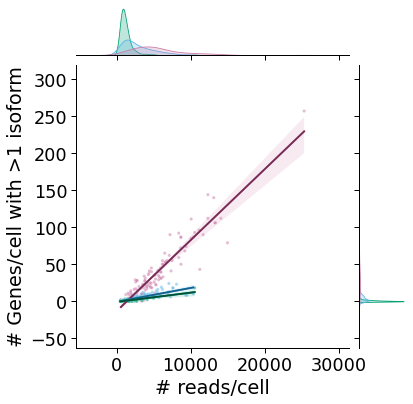

In [18]:
adata = get_sc_transcript_adata()
gene_adata = get_sc_gene_adata()
opref = 'figures/lr'
c_dict, order = get_sample_colors()
xlim = None
ylim = None
plot_iso_complexity_vs_reads(adata, gene_adata, 'sample', xlim, ylim,
                    c_dict, order, how='iso', opref=opref)

Transforming to str index.
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


Slope of 3 correlation: 0.009217922628767684
Slope of 2 correlation: 0.00415607570983559
Slope of 1 correlation: 0.002329957588501765
Slope of 5 correlation: 0.0011909988959094124
Slope of 6 correlation: 0.0007163942375751139
Slope of 7 correlation: 0.0014739933051790657
Slope of 4 correlation: 0.00038527778433623583


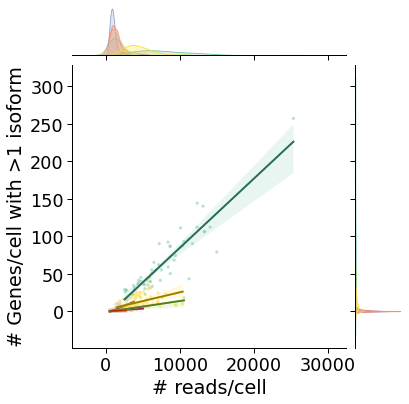

In [4]:
adata = get_sc_transcript_adata()
gene_adata = get_sc_gene_adata()
opref = 'figures/lr'
c_dict, order = get_lr_cluster_colors()
xlim = None
ylim = None
plot_iso_complexity_vs_reads(adata, gene_adata, 'gene_leiden', xlim, ylim,
                    c_dict, order, how='iso', opref=opref)

Transforming to str index.
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


Slope of MB correlation: 0.008322012437306814
Slope of MNC correlation: 0.0009761472971508227
Slope of MT correlation: 0.0013627640189400288


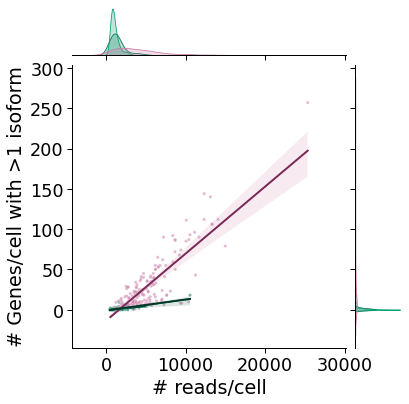

In [5]:
adata = get_sc_transcript_adata()
gene_adata = get_sc_gene_adata()
opref = 'figures/lr'
c_dict, order = get_condition_colors()
xlim = None
ylim = None
plot_iso_complexity_vs_reads(adata, gene_adata, 'celltype', xlim, ylim,
                    c_dict, order, how='iso', opref=opref)

### Number of genes with >1 TSS / cell 

Transforming to str index.
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


Slope of MB_cells correlation: 0.01761262030596631
Slope of MB_nuclei correlation: 0.007880287703592202
Slope of MT_nuclei correlation: 0.006814909879803799


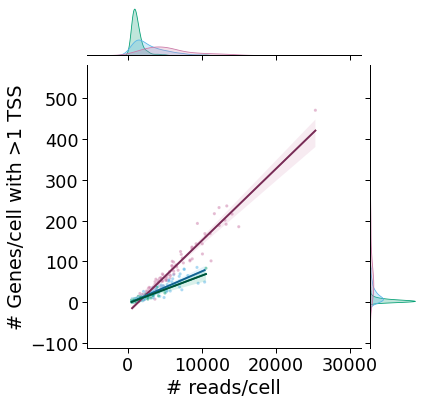

In [19]:
adata = get_tss_adata()
gene_adata = get_sc_gene_adata()
opref = 'figures/lr'
c_dict, order = get_sample_colors()
xlim = None
ylim = None
plot_iso_complexity_vs_reads(adata, gene_adata, 'sample', xlim, ylim,
                    c_dict, order, how='tss', opref=opref)

Transforming to str index.
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


Slope of 3 correlation: 0.018509285046935855
Slope of 2 correlation: 0.009628953240820451
Slope of 1 correlation: 0.009078969809322848
Slope of 5 correlation: 0.005668681850390802
Slope of 6 correlation: 0.004399421418093514
Slope of 7 correlation: 0.007419756778083124
Slope of 4 correlation: 0.005452743052360881


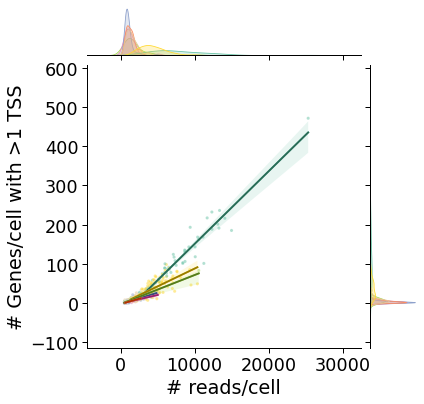

In [6]:
adata = get_tss_adata()
gene_adata = get_sc_gene_adata()
opref = 'figures/lr'
c_dict, order = get_lr_cluster_colors()
xlim = None
ylim = None
plot_iso_complexity_vs_reads(adata, gene_adata, 'gene_leiden', xlim, ylim,
                    c_dict, order, how='tss', opref=opref)

Transforming to str index.
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


Slope of MB correlation: 0.01565599389344355
Slope of MNC correlation: 0.005528995381679078
Slope of MT correlation: 0.007147356799419331


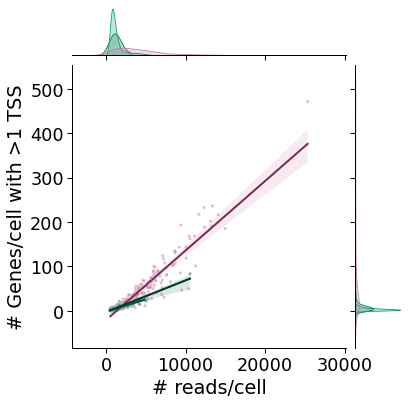

In [7]:
adata = get_tss_adata()
gene_adata = get_sc_gene_adata()
opref = 'figures/lr'
c_dict, order = get_condition_colors()
xlim = None
ylim = None
plot_iso_complexity_vs_reads(adata, gene_adata, 'celltype', xlim, ylim,
                    c_dict, order, how='tss', opref=opref)

### Number of genes w/ >1 TES per cell 

Transforming to str index.
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


Slope of MB_cells correlation: 0.01761262030596631
Slope of MB_nuclei correlation: 0.007880287703592202
Slope of MT_nuclei correlation: 0.006814909879803799


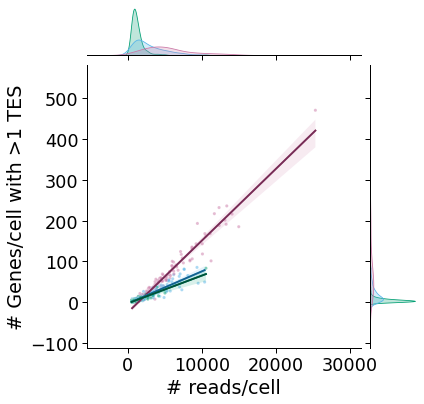

In [20]:
adata = get_tss_adata()
gene_adata = get_sc_gene_adata()
opref = 'figures/lr'
c_dict, order = get_sample_colors()
xlim = None
ylim = None
plot_iso_complexity_vs_reads(adata, gene_adata, 'sample', xlim, ylim,
                    c_dict, order, how='tes', opref=opref)

Transforming to str index.
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


Slope of 3 correlation: 0.018509285046935855
Slope of 2 correlation: 0.009628953240820451
Slope of 1 correlation: 0.009078969809322848
Slope of 5 correlation: 0.005668681850390802
Slope of 6 correlation: 0.004399421418093514
Slope of 7 correlation: 0.007419756778083124
Slope of 4 correlation: 0.005452743052360881


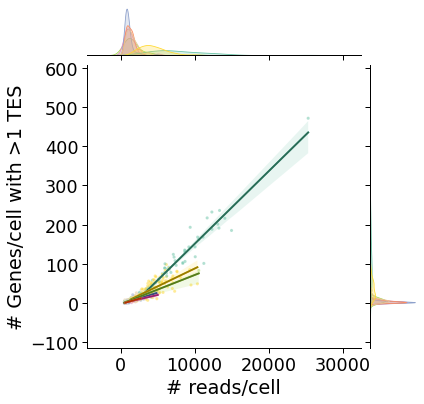

In [8]:
adata = get_tss_adata()
gene_adata = get_sc_gene_adata()
opref = 'figures/lr'
c_dict, order = get_lr_cluster_colors()
xlim = None
ylim = None
plot_iso_complexity_vs_reads(adata, gene_adata, 'gene_leiden', xlim, ylim,
                    c_dict, order, how='tes', opref=opref)

Transforming to str index.
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
AnnData expects .obs.index to contain strings, but your first indices are: Int64Index([0, 1], dtype='int64'), …


Slope of MB correlation: 0.01565599389344355
Slope of MNC correlation: 0.005528995381679078
Slope of MT correlation: 0.007147356799419331


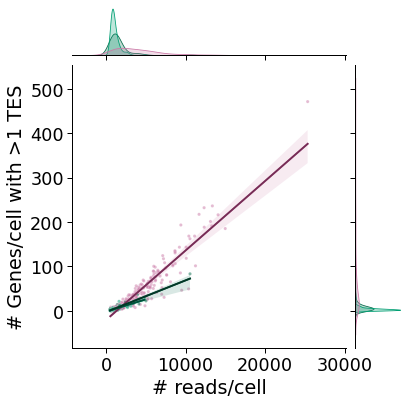

In [9]:
adata = get_tss_adata()
gene_adata = get_sc_gene_adata()
opref = 'figures/lr'
c_dict, order = get_condition_colors()
xlim = None
ylim = None
plot_iso_complexity_vs_reads(adata, gene_adata, 'celltype', xlim, ylim,
                    c_dict, order, how='tes', opref=opref)